In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
movies = pd.read_csv('../input/movies/movies.csv')
print(f"There are {movies.shape[0]} movies in the dataset with {movies.shape[1]} different traits for each movie.")

There are 7668 movies in the dataset with 15 different traits for each movie.


In [3]:
list(movies.columns)

['name',
 'rating',
 'genre',
 'year',
 'released',
 'score',
 'votes',
 'director',
 'writer',
 'star',
 'country',
 'budget',
 'gross',
 'company',
 'runtime']

In [4]:
columns_to_drop = [
    'released', 'director','writer', 'star', 'country', 'runtime'
]

movies.drop(columns_to_drop, axis='columns', inplace=True)

Ignoring writer,director, and star as I'm interested more in numbers and the overall picture. Ignoring country as it may be skewed based upon US data, Ignoring released date and runtime and its effect on movie outcomes

In [5]:
movies.dropna(subset=['budget', 'gross', 'score','votes'], inplace=True)
movies.shape

(5436, 9)

removing all rows with 'NaN' in those columns because they may skew results of any calculations

In [6]:
rating_group = movies.groupby('rating')
rating_group['score'].mean().sort_values(ascending=False).reset_index()

,rating,score
0,X,7.300000
1,Not Rated,6.900000
2,TV-MA,6.850000
3,Unrated,6.800000
4,NC-17,6.658333
5,G,6.563063
6,R,6.499422
7,PG-13,6.293642
8,PG,6.216832
9,Approved,3.400000


Find audience score based upon genre

In [7]:
movies['profit'] = movies['gross'] - movies['budget']
company_group = movies.groupby('company')
company_group['profit'].sum().sort_values(ascending=False).reset_index()

,company,profit
0,Universal Pictures,3.525138e+10
1,Warner Bros.,3.520490e+10
2,Twentieth Century Fox,2.806797e+10
3,Columbia Pictures,2.684432e+10
4,Paramount Pictures,2.629825e+10
...,...,...
1476,Beijing New Picture Film,-9.114436e+07
1477,Appian Way,-9.165989e+07
1478,Gaumont,-9.463578e+07
1479,Tribeca Productions,-1.685426e+08


creates new column to calculate profit based on gross and budget

In [8]:
my_movies = pd.DataFrame(movies[(movies.profit > 0) ])
my_movies.shape

(3684, 10)

In [9]:
my_movies.genre.unique()

array(['Drama', 'Adventure', 'Action', 'Comedy', 'Horror', 'Biography',
       'Crime', 'Fantasy', 'Animation', 'Family', 'Romance', 'Thriller',
       'Mystery', 'Sci-Fi', 'Western'], dtype=object)

In [10]:
def genre_def(genre):
    genre_dict = {
        'Comedy': 'Comedy',
        'Action': 'Action',
        'Drama': 'Drama',
        'Crime': 'Crime',
        'Adventure': 'Adventure',
        'Biography': 'Biography',
        'Animation': 'Animation',
        'Horror': 'Horror'
    }
    
    try:
        return genre_dict[genre]
    except KeyError:
        return 'Other'

Since the other gneres were negligible on the bar chart, I chose to bundle them into a single column named other to make the data look cleaner and easier to read

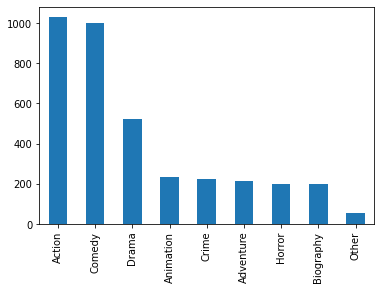

In [11]:
my_movies['genre'] = my_movies.genre.apply(genre_def)
my_movies['genre'].value_counts().plot(kind='bar');

In [12]:
movies_by_genre = my_movies.groupby( ['genre', 'year'])['genre'].count().to_frame().rename(columns={'genre': 'genre_count'}).reset_index()

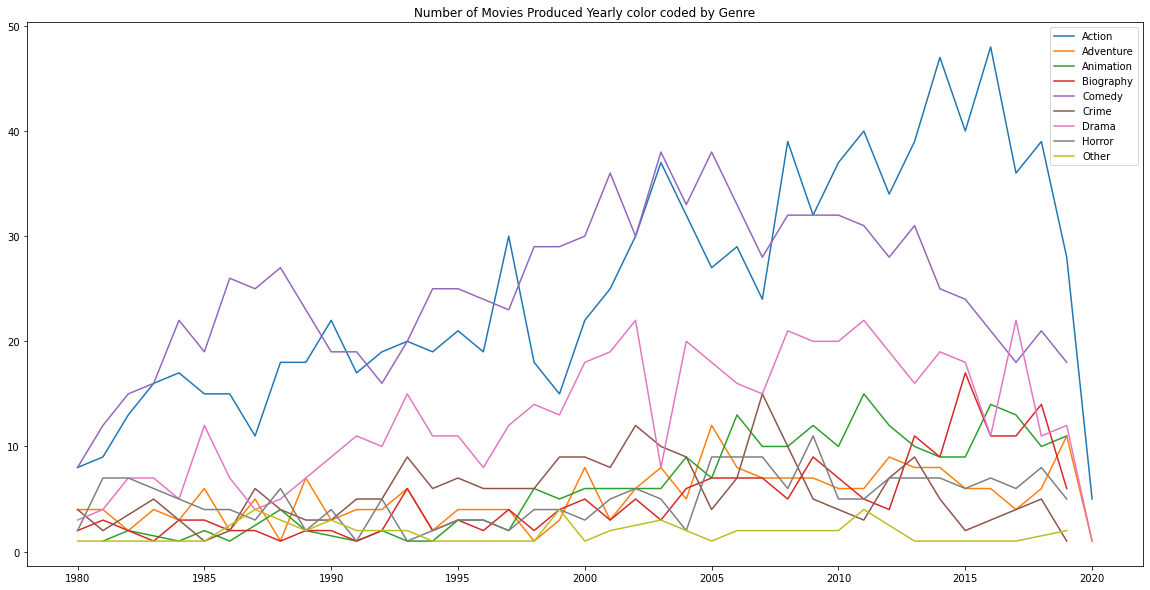

In [13]:
genres = list(movies_by_genre.genre.unique())
fig, ax = plt.subplots(figsize=(20,10))
for genre in genres:
    x=movies_by_genre[movies_by_genre['genre'] == genre]['year']
    y=movies_by_genre[movies_by_genre['genre'] == genre]['genre_count']
    plt.plot(x,y, label=genre)
plt.title('Number of Movies Produced Yearly color coded by Genre')
plt.legend()
plt.show()

All movie genres suffered decline from 2015 to 2020. Action tends to be the most popular genre, followed by comedy, and drama. In 2003 Drama took a dive while comedy and action shot up. In 2008, all movie genres decreased except crime.